# **Week 3: Univariate and Bivariate Visual Analysis**

In [0]:
import pandas as pd

output_path = "/Volumes/workspace/airlines/flight/cleaned_dataset.csv"
data = pd.read_csv(output_path)
display(data.head(10))

DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DurationDiff,DepDelayed_Flag,ArrDelayed_Flag,TotalDelay,Month,DayOfWeekNum,DayName,Hour,Route,IsWeekend,TIME_OF_DAY
4,2019-03-01,18:29:00,1959,1925,11,9,3920,N464WN,90,90,77,34,34,124,105,42,15,515,3,10,0,0,0,2,0,0,0,32,0,1,1,34,3,4,Friday,null,124 → 42,0,Unknown
4,2019-03-01,19:37:00,2037,1940,11,9,509,N763SW,240,250,230,57,67,124,105,138,143,1591,3,7,0,0,0,10,0,0,0,47,-10,1,1,57,3,4,Friday,null,124 → 138,0,Unknown
4,2019-03-01,16:44:00,1845,1725,11,9,1333,N334SW,121,135,107,80,94,124,105,158,172,828,6,8,0,0,0,8,0,0,0,72,-14,1,1,80,3,4,Friday,null,124 → 158,0,Unknown
4,2019-03-01,14:52:00,1640,1625,11,9,675,N286WN,228,240,213,15,27,124,105,199,178,1489,7,8,0,0,0,3,0,0,0,12,-12,1,1,15,3,4,Friday,null,124 → 199,0,Unknown
4,2019-03-01,13:23:00,1526,1510,11,9,4,N674AA,123,135,110,16,28,124,105,256,226,838,4,9,0,0,0,0,0,0,0,16,-12,1,1,16,3,4,Friday,null,124 → 256,0,Unknown
4,2019-03-01,14:16:00,1512,1435,11,9,54,N643SW,56,70,49,37,51,126,132,42,15,220,2,5,0,0,0,12,0,0,0,25,-14,1,1,37,3,4,Friday,null,126 → 42,0,Unknown
4,2019-03-01,16:57:00,1754,1735,11,9,623,N724SW,57,70,47,19,32,126,132,42,15,220,5,5,0,0,0,7,0,0,0,12,-13,1,1,19,3,4,Friday,null,126 → 42,0,Unknown
4,2019-03-01,14:22:00,1657,1610,11,9,188,N215WN,155,195,143,47,87,126,132,93,77,1093,6,6,0,0,0,40,0,0,0,7,-40,1,1,47,3,4,Friday,null,126 → 93,0,Unknown
4,2019-03-01,21:07:00,2334,2230,11,9,362,N798SW,147,165,134,64,82,126,132,158,172,972,6,7,0,0,0,5,0,0,0,59,-18,1,1,64,3,4,Friday,null,126 → 158,0,Unknown
4,2019-03-01,18:12:00,1927,1815,11,9,422,N779SW,135,145,118,72,82,126,132,160,43,765,6,11,0,0,0,3,0,0,0,69,-10,1,1,72,3,4,Friday,null,126 → 160,0,Unknown


In [0]:
top_airlines = (
    data['Airline']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'Airline', 'Airline': 'FlightCount'})
)
display(top_airlines)

Airline,FlightCount
9,81442
2,30549
1,29338
8,26557
11,22988
10,13851
4,12073
3,11820
0,5540
7,5173


Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DurationDiff', 'DepDelayed_Flag', 'ArrDelayed_Flag', 'TotalDelay',
       'Month', 'DayOfWeekNum', 'DayName', 'Hour', 'Route', 'IsWeekend',
       'TIME_OF_DAY'],
      dtype='object')


/home/spark-c357a8a6-32ba-4ee9-a404-c3/.ipykernel/2453/command-4895319086878847-3133341264:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


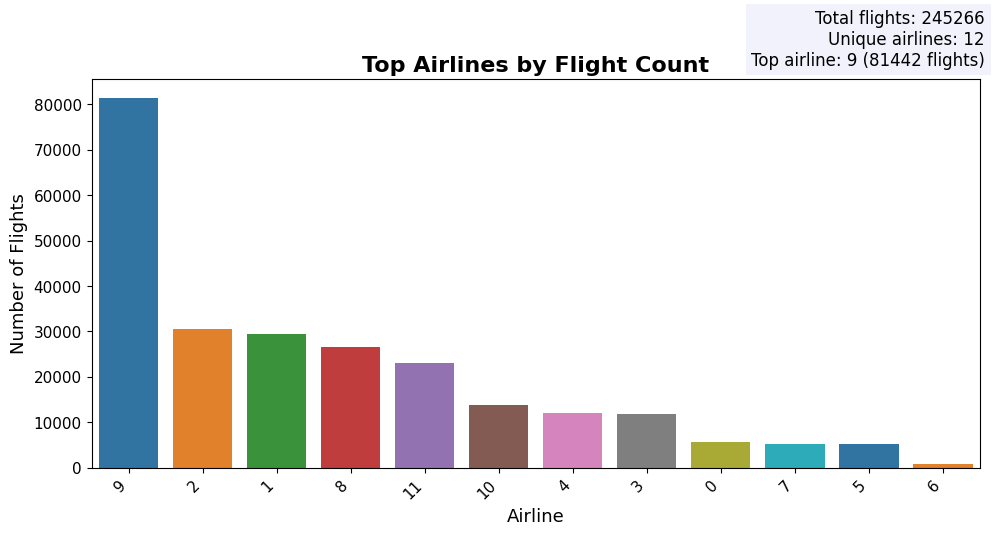


**Observation:**
- The dataset contains a total of **245266** flights operated by **12** unique airlines.
- The airline with the highest number of flights is **9** with **81442** flights.
- There is a significant variation in flight counts among airlines, indicating differing market shares.


In [0]:
print(data.columns)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
palette = sns.color_palette("tab10", n_colors=len(data['Airline'].unique()))
sns.countplot(
    data=data,
    x='Airline',
    order=data['Airline'].value_counts().index,
    palette=palette
)
plt.title("Top Airlines by Flight Count", fontsize=16, fontweight='bold')
plt.xlabel("Airline", fontsize=13)
plt.ylabel("Number of Flights", fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

top_airline = data['Airline'].value_counts().idxmax()
top_count = data['Airline'].value_counts().max()
total_flights = len(data)
unique_airlines = data['Airline'].nunique()
plt.figtext(
    0.99, 0.95,
    f"Total flights: {total_flights}\nUnique airlines: {unique_airlines}\nTop airline: {top_airline} ({top_count} flights)",
    horizontalalignment='right',
    fontsize=12,
    bbox=dict(facecolor='lavender', alpha=0.5, edgecolor='none')
)

plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

insights = f"""
**Observation:**
- The dataset contains a total of **{total_flights}** flights operated by **{unique_airlines}** unique airlines.
- The airline with the highest number of flights is **{top_airline}** with **{top_count}** flights.
- There is a significant variation in flight counts among airlines, indicating differing market shares.
"""

display(Markdown(insights))

In [0]:
top_routes = (
    data['Route']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'Route', 'Route': 'FlightCount'})
)
display(top_routes)

,Route,FlightCount
0,115 → 69,949
1,137 → 140,921
2,68 → 116,845
3,232 → 140,816
4,198 → 138,815
5,139 → 232,705
6,139 → 184,701
7,72 → 138,695
8,139 → 237,681
9,198 → 222,670


/home/spark-c357a8a6-32ba-4ee9-a404-c3/.ipykernel/2453/command-4895319086878849-1816167831:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


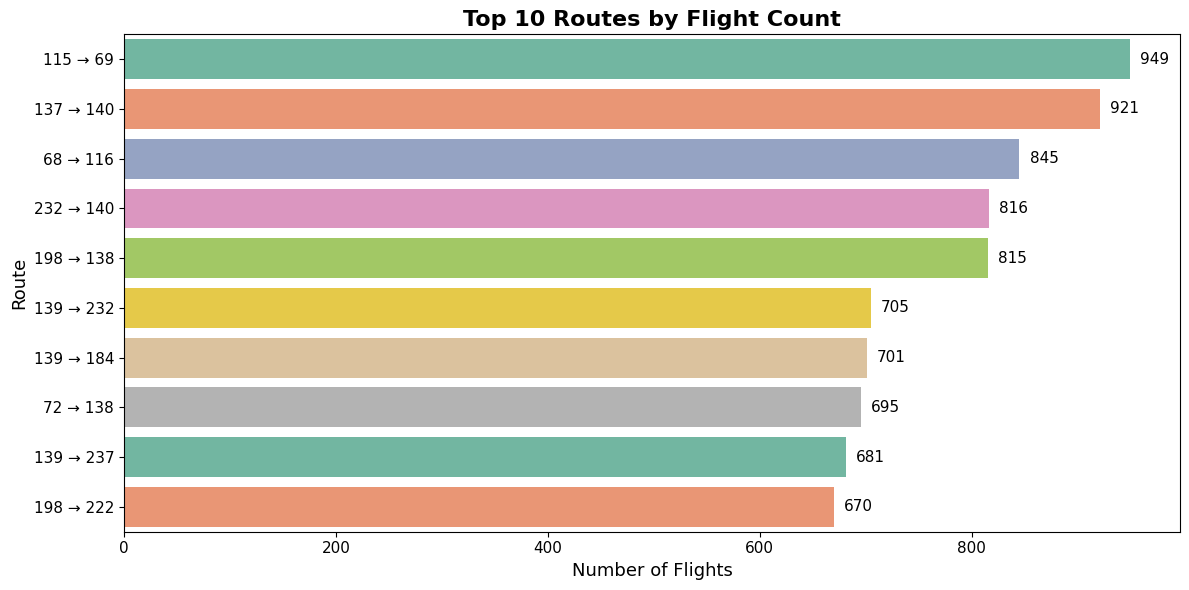

**Observation:**
- The most popular route is **115 → 69** with **949** flights, accounting for **0.39%** of all flights in the dataset.
- The second most frequent route is **137 → 140** with **921** flights, which is 28 fewer than the top route.
- There is a noticeable drop-off in flight counts after the top few routes, indicating that a small number of routes handle a disproportionately large share of total flights.
- These high-traffic routes likely connect major business or hub airports, reflecting key corridors in the airline network.
- Understanding these top routes can help airlines optimize scheduling, resource allocation, and identify potential areas for service expansion.

In [0]:
data['Route'] = data['Origin'].astype(str) + ' → ' + data['Dest'].astype(str)
top_routes = data['Route'].value_counts().head(10)

plt.figure(figsize=(12,6))
palette = sns.color_palette("Set2", n_colors=len(top_routes))
sns.barplot(
    x=top_routes.values, 
    y=top_routes.index, 
    palette=palette
)
plt.title("Top 10 Routes by Flight Count", fontsize=16, fontweight='bold')
plt.xlabel("Number of Flights", fontsize=13)
plt.ylabel("Route", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
for i, v in enumerate(top_routes.values):
    plt.text(v + max(top_routes.values)*0.01, i, str(v), color='black', va='center', fontsize=11)

plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

total_flights = data.shape[0]
top_route = top_routes.index[0]
top_count = top_routes.values[0]
percent_top = (top_count / total_flights) * 100
second_route = top_routes.index[1]
second_count = top_routes.values[1]
drop_off = top_count - second_count

insight_text = (
    f"**Observation:**\n"
    f"- The most popular route is **{top_route}** with **{top_count}** flights, accounting for **{percent_top:.2f}%** of all flights in the dataset.\n"
    f"- The second most frequent route is **{second_route}** with **{second_count}** flights, which is {drop_off} fewer than the top route.\n"
    f"- There is a noticeable drop-off in flight counts after the top few routes, indicating that a small number of routes handle a disproportionately large share of total flights.\n"
    f"- These high-traffic routes likely connect major business or hub airports, reflecting key corridors in the airline network.\n"
    f"- Understanding these top routes can help airlines optimize scheduling, resource allocation, and identify potential areas for service expansion."
)
display(Markdown(insight_text))

/home/spark-c357a8a6-32ba-4ee9-a404-c3/.ipykernel/2453/command-4895319086878850-4219038397:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


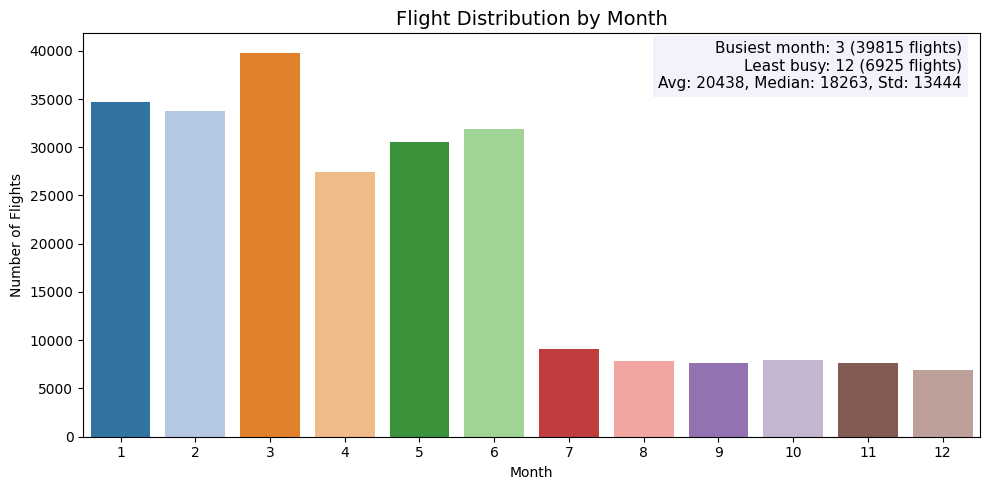

Months with above-average flights: [1, 2, 3, 4, 5, 6]
Months with below-average flights: [7, 8, 9, 10, 11, 12]



**Observations:**
- The busiest month is **3** with **39815** flights.
- The least busy month is **12** with **6925** flights.
- The average number of flights per month is **20438**, with a median of **18263** and a standard deviation of **13444**.
- There is a noticeable variation in flight volume across months, which may reflect seasonality or holiday travel patterns.


In [0]:
plt.figure(figsize=(10,5))
palette = sns.color_palette("tab20", len(data['Month'].dropna().unique()))
sns.countplot(
    data=data, 
    x='Month', 
    order=sorted(data['Month'].dropna().unique()), 
    palette=palette
)
plt.title("Flight Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.tight_layout()

month_counts = data['Month'].value_counts().sort_index()
busiest_month = month_counts.idxmax()
least_busy_month = month_counts.idxmin()
avg_flights = int(month_counts.mean())
median_flights = int(month_counts.median())
std_flights = int(month_counts.std())

# Add insights inside the plot at the top right corner
plt.gca().text(
    0.98, 0.98,
    f"Busiest month: {busiest_month} ({month_counts[busiest_month]} flights)\n"
    f"Least busy: {least_busy_month} ({month_counts[least_busy_month]} flights)\n"
    f"Avg: {avg_flights}, Median: {median_flights}, Std: {std_flights}",
    ha='right', va='top',
    fontsize=11,
    bbox=dict(facecolor='lavender', alpha=0.5, edgecolor='none'),
    transform=plt.gca().transAxes
)

plt.show()

months_above_avg = month_counts[month_counts > avg_flights].index.tolist()
months_below_avg = month_counts[month_counts < avg_flights].index.tolist()
print(f"Months with above-average flights: {months_above_avg}")
print(f"Months with below-average flights: {months_below_avg}")

from IPython.display import display, Markdown

observation = f"""
**Observations:**
- The busiest month is **{busiest_month}** with **{month_counts[busiest_month]}** flights.
- The least busy month is **{least_busy_month}** with **{month_counts[least_busy_month]}** flights.
- The average number of flights per month is **{avg_flights}**, with a median of **{median_flights}** and a standard deviation of **{std_flights}**.
- There is a noticeable variation in flight volume across months, which may reflect seasonality or holiday travel patterns.
"""

display(Markdown(observation))

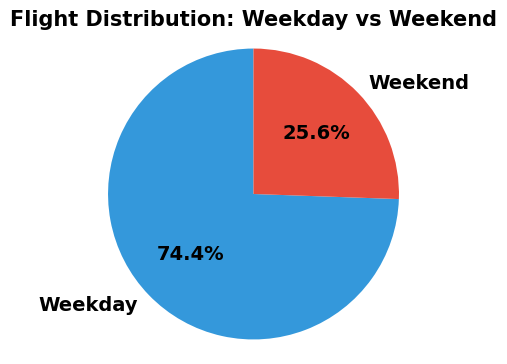


**Observation:**
- There are **182586** weekday flights (**74.44%**) and **62680** weekend flights (**25.56%**) in the dataset.
- The distribution shows more flights on weekdays compared to weekends.
- This pattern may reflect business travel demand, which is typically higher on weekdays.


In [0]:
data['IsWeekend'] = data['DayOfWeekNum'].apply(lambda x: 1 if x in [5, 6] else 0)

# Pie chart for Weekday vs Weekend flight distribution
weekend_count = data['IsWeekend'].sum()
weekday_count = (data['IsWeekend'] == 0).sum()
counts = [weekday_count, weekend_count]
labels = ['Weekday', 'Weekend']
colors = ['#3498db', '#e74c3c']  # Updated to more attractive blue and red

fig, ax = plt.subplots(figsize=(5,5))  # Minimized chart size
wedges, texts, autotexts = ax.pie(
    counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    textprops={'fontsize': 14, 'weight': 'bold'}
)
ax.set_title("Flight Distribution: Weekday vs Weekend", fontsize=15, fontweight='bold')
ax.axis('equal')

plt.subplots_adjust(left=0.18, right=0.82, top=0.82, bottom=0.18)
plt.show()

from IPython.display import display, Markdown

total_flights = len(data)
weekend_pct = (weekend_count / total_flights) * 100
weekday_pct = (weekday_count / total_flights) * 100

insight = f"""
**Observation:**
- There are **{weekday_count}** weekday flights (**{weekday_pct:.2f}%**) and **{weekend_count}** weekend flights (**{weekend_pct:.2f}%**) in the dataset.
- The distribution shows {'more' if weekday_count > weekend_count else 'fewer'} flights on weekdays compared to weekends.
- This pattern may reflect business travel demand, which is typically higher on weekdays.
"""

display(Markdown(insight))

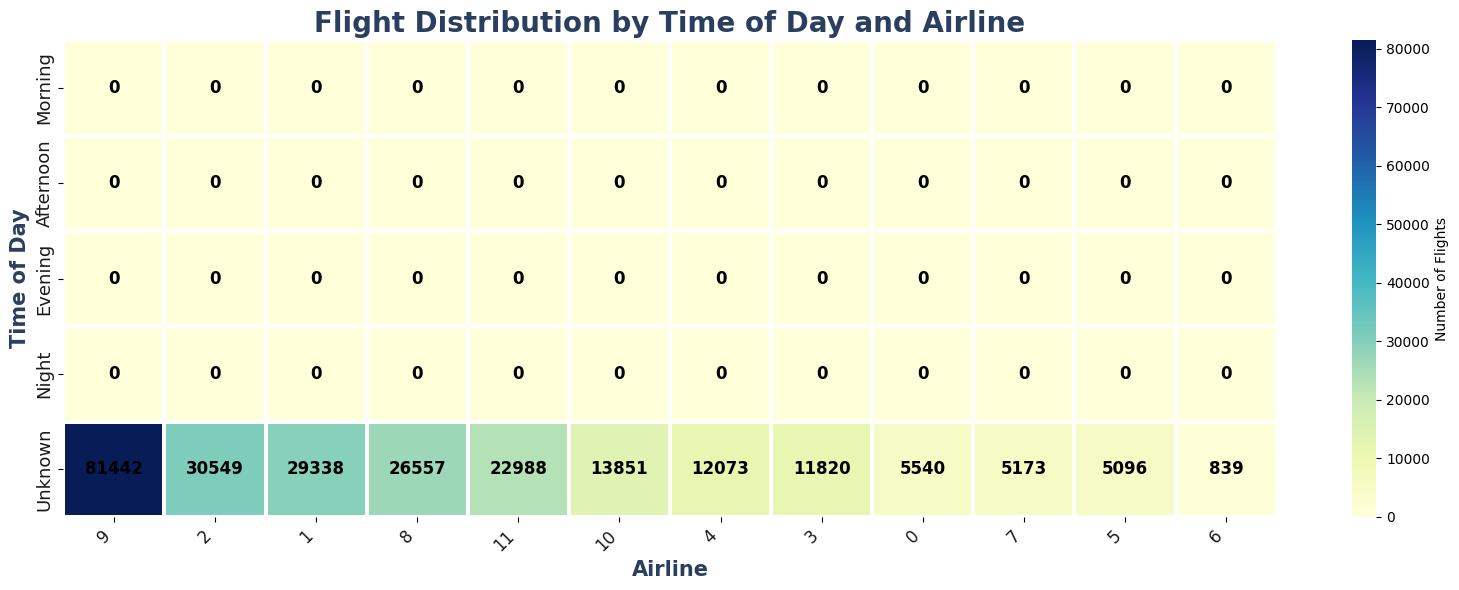


**Observation:**
- The most common time of day for departures is **Unknown** with **245266** flights (**100.00%** of all flights).
- The heatmap reveals how flight schedules are distributed across airlines and times of day.
- 'Unknown' values may indicate missing or invalid departure time data.


In [0]:
def get_time_of_day(dep_time):
    if pd.isna(dep_time):
        return 'Unknown'
    if 5 <= dep_time < 12:
        return 'Morning'
    elif 12 <= dep_time < 17:
        return 'Afternoon'
    elif 17 <= dep_time < 21:
        return 'Evening'
    else:
        return 'Night'

# Use the 'Hour' column, which contains integer hour values
data['TIME_OF_DAY'] = data['Hour'].apply(get_time_of_day)

# Prepare data for heatmap: count of flights by TIME_OF_DAY and Airline
time_order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Unknown']
airline_order = data['Airline'].value_counts().index.tolist()
heatmap_data = (
    data.groupby(['TIME_OF_DAY', 'Airline'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=time_order, columns=airline_order, fill_value=0)
)

plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=1.5,
    linecolor='white',
    cbar_kws={'label': 'Number of Flights'},
    annot_kws={"size":12, "weight":"bold", "color":"black"}
)
plt.title("Flight Distribution by Time of Day and Airline", fontsize=20, fontweight='bold', color='#2a3f5f')
plt.xlabel("Airline", fontsize=15, fontweight='bold', color='#2a3f5f')
plt.ylabel("Time of Day", fontsize=15, fontweight='bold', color='#2a3f5f')
plt.xticks(fontsize=12, rotation=45, ha='right', color='#1a1a1a')
plt.yticks(fontsize=13, color='#1a1a1a')
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

total_flights = len(data)
top_time = data['TIME_OF_DAY'].value_counts().idxmax()
top_count = data['TIME_OF_DAY'].value_counts().max()
top_pct = (top_count / total_flights) * 100

insight = f"""
**Observation:**
- The most common time of day for departures is **{top_time}** with **{top_count}** flights (**{top_pct:.2f}%** of all flights).
- The heatmap reveals how flight schedules are distributed across airlines and times of day.
- 'Unknown' values may indicate missing or invalid departure time data.
"""

display(Markdown(insight))

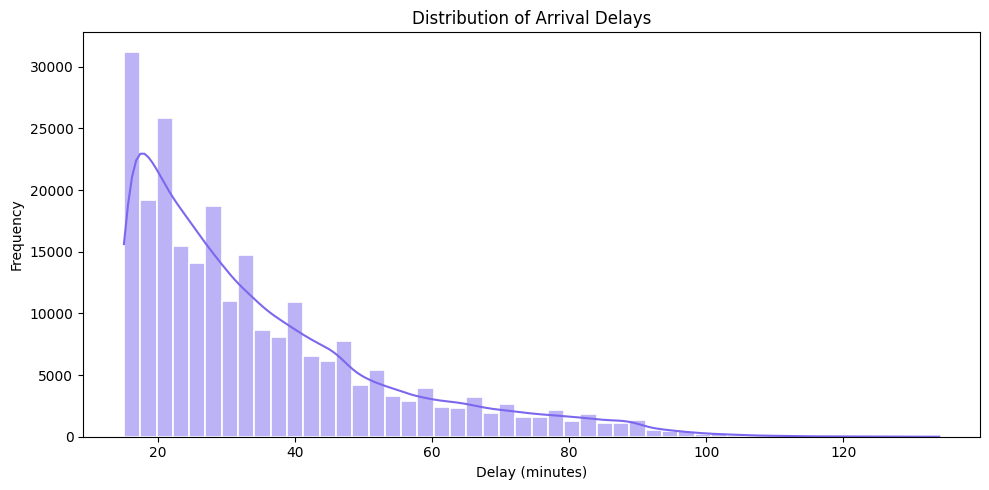


**Observation:**
- The average arrival delay is **34.85** minutes, with a median of **29.00** minutes.
- The standard deviation of delays is **18.55** minutes, indicating variability in arrival times.
- The minimum delay is **15** minutes and the maximum is **134** minutes.
- **0.00%** of flights arrived on time or early (delay ≤ 0).
- The distribution is likely right-skewed, with most flights experiencing small delays and a few outliers with significant delays.


In [0]:
plt.figure(figsize=(10,5))
sns.histplot(data['ArrDelay'], bins=50, kde=True, color='mediumslateblue', edgecolor='white', linewidth=1.2)
plt.title("Distribution of Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

mean_delay = data['ArrDelay'].mean()
median_delay = data['ArrDelay'].median()
std_delay = data['ArrDelay'].std()
min_delay = data['ArrDelay'].min()
max_delay = data['ArrDelay'].max()
pct_on_time = (data['ArrDelay'] <= 0).mean() * 100

insight = f"""
**Observation:**
- The average arrival delay is **{mean_delay:.2f}** minutes, with a median of **{median_delay:.2f}** minutes.
- The standard deviation of delays is **{std_delay:.2f}** minutes, indicating variability in arrival times.
- The minimum delay is **{min_delay}** minutes and the maximum is **{max_delay}** minutes.
- **{pct_on_time:.2f}%** of flights arrived on time or early (delay ≤ 0).
- The distribution is likely right-skewed, with most flights experiencing small delays and a few outliers with significant delays.
"""

display(Markdown(insight))

/home/spark-c357a8a6-32ba-4ee9-a404-c3/.ipykernel/2453/command-4895319086878854-1624870555:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Airline', y='ArrDelay', palette=palette)


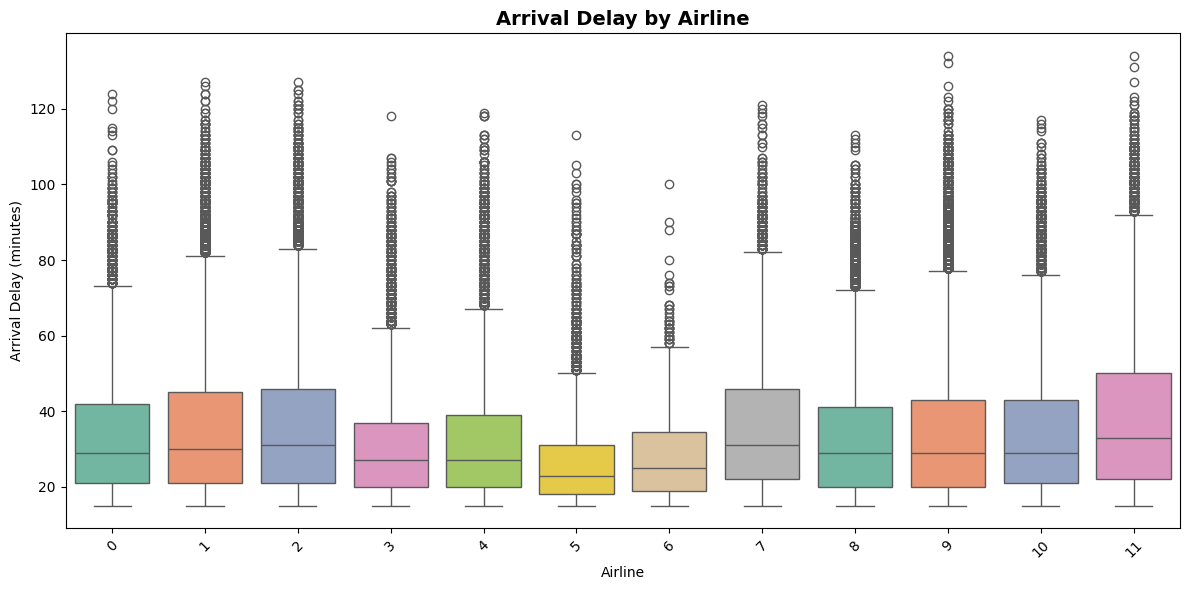


**Insights:**
- The airline with the highest average arrival delay is **11.0** with **38.95** minutes.
- The airline with the lowest average arrival delay is **5.0** with **26.68** minutes.
- There is substantial variation in delay distributions across airlines, as shown by the spread and outliers in the boxplots.
- Airlines with higher median and mean delays may face operational or scheduling challenges.


In [0]:
plt.figure(figsize=(12,6))
palette = sns.color_palette("Set2", len(data['Airline'].unique()))
sns.boxplot(data=data, x='Airline', y='ArrDelay', palette=palette)
plt.title("Arrival Delay by Airline", fontsize=14, fontweight='bold')
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

airline_delay_stats = data.groupby('Airline')['ArrDelay'].agg(['mean', 'median', 'std', 'count']).reset_index()
top_delay_airline = airline_delay_stats.sort_values('mean', ascending=False).iloc[0]
lowest_delay_airline = airline_delay_stats.sort_values('mean').iloc[0]

insight = f"""
**Insights:**
- The airline with the highest average arrival delay is **{top_delay_airline['Airline']}** with **{top_delay_airline['mean']:.2f}** minutes.
- The airline with the lowest average arrival delay is **{lowest_delay_airline['Airline']}** with **{lowest_delay_airline['mean']:.2f}** minutes.
- There is substantial variation in delay distributions across airlines, as shown by the spread and outliers in the boxplots.
- Airlines with higher median and mean delays may face operational or scheduling challenges.
"""

display(Markdown(insight))

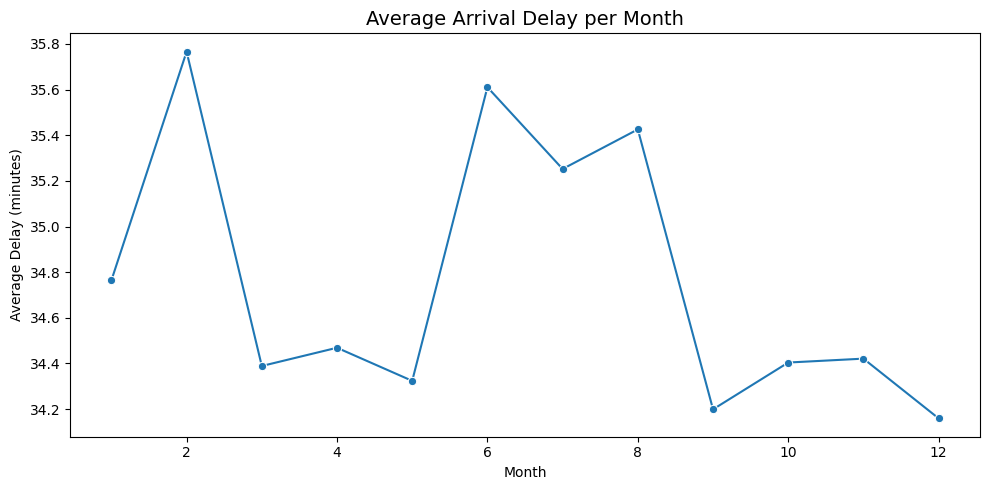


**Observation:**
- The month with the highest average arrival delay is **2** (**35.77** minutes).
- The month with the lowest average arrival delay is **12** (**34.16** minutes).
- The average monthly arrival delay across all months is **34.77** minutes.
- This trend may reflect seasonal factors, weather patterns, or operational challenges affecting flight punctuality.


In [0]:
monthly_delay = data.groupby('Month')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_delay, x='Month', y='ArrDelay', marker='o')
plt.title("Average Arrival Delay per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

max_month = monthly_delay.loc[monthly_delay['ArrDelay'].idxmax(), 'Month']
max_delay = monthly_delay['ArrDelay'].max()
min_month = monthly_delay.loc[monthly_delay['ArrDelay'].idxmin(), 'Month']
min_delay = monthly_delay['ArrDelay'].min()
avg_delay = monthly_delay['ArrDelay'].mean()

insight = f"""
**Observation:**
- The month with the highest average arrival delay is **{max_month}** (**{max_delay:.2f}** minutes).
- The month with the lowest average arrival delay is **{min_month}** (**{min_delay:.2f}** minutes).
- The average monthly arrival delay across all months is **{avg_delay:.2f}** minutes.
- This trend may reflect seasonal factors, weather patterns, or operational challenges affecting flight punctuality.
"""

display(Markdown(insight))

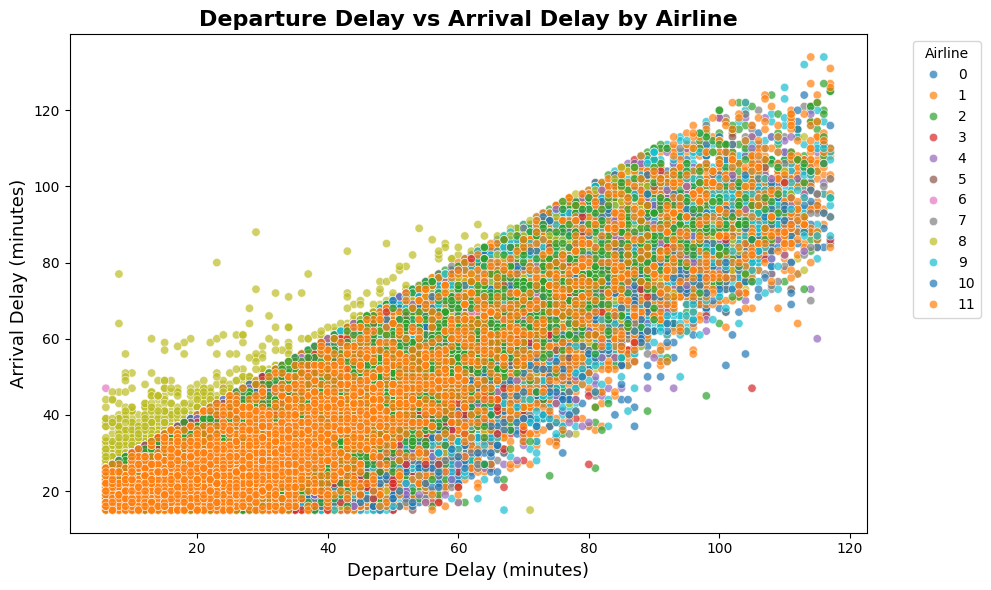


**New Analysis:**
- The scatter plot visualizes the relationship between departure delay and arrival delay for each airline.
- The correlation coefficient between departure and arrival delays is **0.89**.
- A positive correlation suggests that flights departing late are also likely to arrive late, though the strength of this relationship may vary by airline.
- Outliers may indicate flights that made up time in the air or experienced additional delays after departure.


In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x='DepDelay',
    y='ArrDelay',
    hue='Airline',
    palette='tab10',
    alpha=0.7
)
plt.title("Departure Delay vs Arrival Delay by Airline", fontsize=16, fontweight='bold')
plt.xlabel("Departure Delay (minutes)", fontsize=13)
plt.ylabel("Arrival Delay (minutes)", fontsize=13)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

correlation = data[['DepDelay', 'ArrDelay']].corr().loc['DepDelay', 'ArrDelay']
insight = f"""
**New Analysis:**
- The scatter plot visualizes the relationship between departure delay and arrival delay for each airline.
- The correlation coefficient between departure and arrival delays is **{correlation:.2f}**.
- A positive correlation suggests that flights departing late are also likely to arrive late, though the strength of this relationship may vary by airline.
- Outliers may indicate flights that made up time in the air or experienced additional delays after departure.
"""
display(Markdown(insight))

/home/spark-c357a8a6-32ba-4ee9-a404-c3/.ipykernel/2453/command-6134058668788185-3675903338:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Airline', y='ArrDelay', palette=palette, inner='quartile', scale='width')
/home/spark-c357a8a6-32ba-4ee9-a404-c3/.ipykernel/2453/command-6134058668788185-3675903338:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=data, x='Airline', y='ArrDelay', palette=palette, inner='quartile', scale='width')


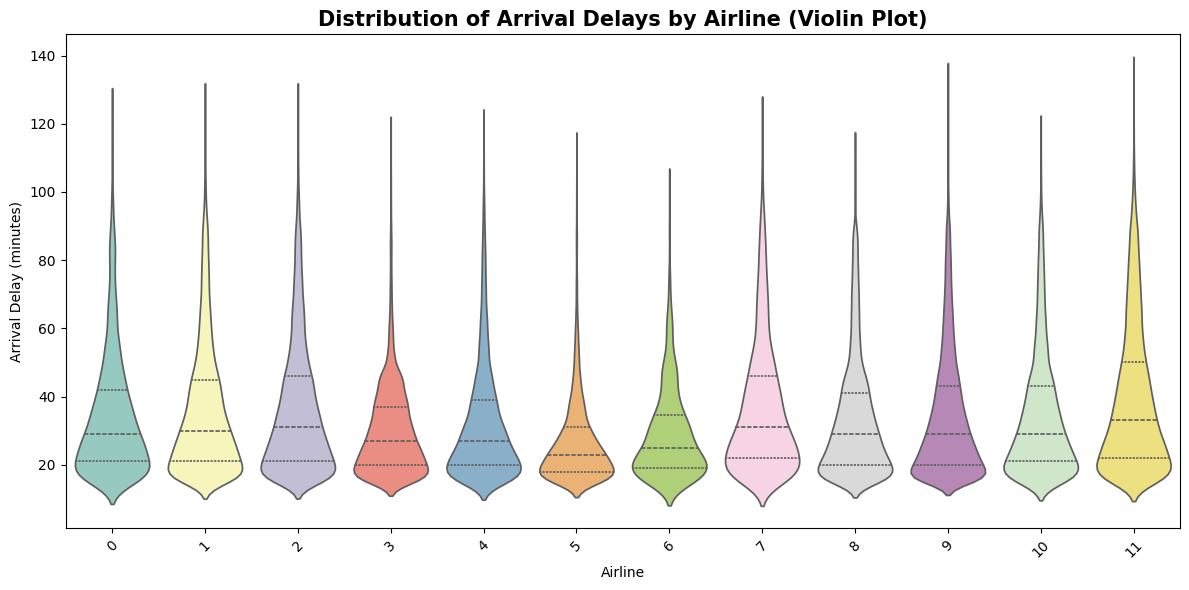


**Violin Plot Analysis:**
- The violin plot visualizes the full distribution of arrival delays for each airline, highlighting both the spread and central tendency.
- **11.0** shows the widest spread in delays (std: 21.04), indicating high variability.
- **5.0** has the most consistent arrival times (std: 12.34).
- The highest median delay is observed for **11.0** (33.00 minutes), while **5.0** has the lowest median delay (23.00 minutes).
- The shape of each violin reveals whether delays are symmetric, skewed, or have multiple peaks, providing deeper insight than boxplots alone.


In [0]:
plt.figure(figsize=(12,6))
palette = sns.color_palette("Set3", len(data['Airline'].unique()))
sns.violinplot(data=data, x='Airline', y='ArrDelay', palette=palette, inner='quartile', scale='width')
plt.title("Distribution of Arrival Delays by Airline (Violin Plot)", fontsize=15, fontweight='bold')
plt.xlabel("Airline")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

# Analysis of violin plot
delay_spread = data.groupby('Airline')['ArrDelay'].agg(['median', 'std', 'count']).reset_index()
widest_spread_airline = delay_spread.sort_values('std', ascending=False).iloc[0]
narrowest_spread_airline = delay_spread.sort_values('std').iloc[0]
highest_median_airline = delay_spread.sort_values('median', ascending=False).iloc[0]
lowest_median_airline = delay_spread.sort_values('median').iloc[0]

analysis = f"""
**Violin Plot Analysis:**
- The violin plot visualizes the full distribution of arrival delays for each airline, highlighting both the spread and central tendency.
- **{widest_spread_airline['Airline']}** shows the widest spread in delays (std: {widest_spread_airline['std']:.2f}), indicating high variability.
- **{narrowest_spread_airline['Airline']}** has the most consistent arrival times (std: {narrowest_spread_airline['std']:.2f}).
- The highest median delay is observed for **{highest_median_airline['Airline']}** ({highest_median_airline['median']:.2f} minutes), while **{lowest_median_airline['Airline']}** has the lowest median delay ({lowest_median_airline['median']:.2f} minutes).
- The shape of each violin reveals whether delays are symmetric, skewed, or have multiple peaks, providing deeper insight than boxplots alone.
"""

display(Markdown(analysis))